In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combination
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

635

In [6]:
cities[0:20]

['saskylakh',
 'cape town',
 'albany',
 'sabha',
 'trois-pistoles',
 'kapaa',
 'yekaterinovka',
 'pemangkat',
 'dikson',
 'fonte boa',
 'nikolskoye',
 'ponta do sol',
 'camopi',
 'smalininkai',
 'fukue',
 'saint-philippe',
 'grimari',
 'provideniya',
 'taolanaro',
 'castro']

In [7]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [18]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [26]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrival   ")
print("--------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_count +=1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_date list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        continue

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrival   
--------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | sabha
Processing Record 5 of Set 1 | trois-pistoles
City not found. Skipping...
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | yekaterinovka
Processing Record 8 of Set 1 | pemangkat
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | fonte boa
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | camopi
Processing Record 14 of Set 1 | smalininkai
Processing Record 15 of Set 1 | fukue
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | grimari
City not found. Skipping...
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | iqa

Processing Record 37 of Set 4 | katha
City not found. Skipping...
Processing Record 38 of Set 4 | cockburn harbour
City not found. Skipping...
Processing Record 39 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | outlook
Processing Record 43 of Set 4 | sondrio
Processing Record 44 of Set 4 | wilmington
Processing Record 45 of Set 4 | kamaishi
Processing Record 46 of Set 4 | furstenfeldbruck
City not found. Skipping...
Processing Record 47 of Set 4 | tabas
Processing Record 48 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 4 | airai
Processing Record 50 of Set 4 | mount gambier
Processing Record 1 of Set 5 | kutum
Processing Record 2 of Set 5 | aswan
Processing Record 3 of Set 5 | walvis bay
Processing Record 4 of Set 5 | jardim
Processing Record 5 of Set 5 | codo
Processing Record 6 of Set 5 | mnogovershinnyy
Processing Record 7 

Processing Record 26 of Set 8 | srednekolymsk
Processing Record 27 of Set 8 | dwarka
Processing Record 28 of Set 8 | beloha
Processing Record 29 of Set 8 | tingi
Processing Record 30 of Set 8 | taitung
Processing Record 31 of Set 8 | izumo
Processing Record 32 of Set 8 | kaspiyskiy
Processing Record 33 of Set 8 | saleaula
City not found. Skipping...
Processing Record 34 of Set 8 | umm lajj
Processing Record 35 of Set 8 | russell
Processing Record 36 of Set 8 | ituni
City not found. Skipping...
Processing Record 37 of Set 8 | port hardy
Processing Record 38 of Set 8 | hirara
Processing Record 39 of Set 8 | borborema
Processing Record 40 of Set 8 | yulara
Processing Record 41 of Set 8 | sao joao da barra
Processing Record 42 of Set 8 | elizabeth city
Processing Record 43 of Set 8 | san pedro
Processing Record 44 of Set 8 | pyrzyce
Processing Record 45 of Set 8 | cullinan
Processing Record 46 of Set 8 | pampa
Processing Record 47 of Set 8 | nguiu
City not found. Skipping...
Processing Rec

Processing Record 13 of Set 12 | barcelos
Processing Record 14 of Set 12 | constantine
Processing Record 15 of Set 12 | los llanos de aridane
Processing Record 16 of Set 12 | lerwick
Processing Record 17 of Set 12 | santa margherita ligure
Processing Record 18 of Set 12 | fianga
City not found. Skipping...
Processing Record 19 of Set 12 | kuching
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pueblo bello
Processing Record 22 of Set 12 | ibanesti
Processing Record 23 of Set 12 | ikom
Processing Record 24 of Set 12 | bac lieu
Processing Record 25 of Set 12 | kalmunai
Processing Record 26 of Set 12 | muswellbrook
Processing Record 27 of Set 12 | tura
Processing Record 28 of Set 12 | pathein
Processing Record 29 of Set 12 | ende
Processing Record 30 of Set 12 | san ramon de la nueva oran
Processing Record 31 of Set 12 | altay
Processing Record 32 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 33 of Set 12 | urumqi
Processing Record 34 of Set 

In [30]:
# Convert the array of dictionaries to a pd df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,39.74,62,100,14.94,RU,2022-09-04 00:37:00
1,Cape Town,-33.9258,18.4232,55.09,90,75,8.05,ZA,2022-09-04 00:36:02
2,Albany,42.6001,-73.9662,74.05,74,100,3.36,US,2022-09-04 00:37:00
3,Sabha,27.0377,14.4283,80.42,29,0,9.64,LY,2022-09-04 00:37:00
4,Kapaa,22.0752,-159.3190,83.19,77,40,6.91,US,2022-09-04 00:37:01
5,Yekaterinovka,52.0508,44.3451,53.04,43,100,7.25,RU,2022-09-04 00:37:01
6,Pemangkat,1.1667,108.9667,78.69,85,100,8.55,ID,2022-09-04 00:37:01
7,Dikson,73.5069,80.5464,39.40,73,7,8.05,RU,2022-09-04 00:37:02
8,Fonte Boa,-2.4959,-66.2662,76.28,79,32,1.19,BR,2022-09-04 00:31:05
9,Nikolskoye,59.7035,30.7861,46.80,91,95,5.19,RU,2022-09-04 00:37:02


In [32]:
new_column_order  = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-09-04 00:37:00,71.9167,114.0833,39.74,62,100,14.94
1,Cape Town,ZA,2022-09-04 00:36:02,-33.9258,18.4232,55.09,90,75,8.05
2,Albany,US,2022-09-04 00:37:00,42.6001,-73.9662,74.05,74,100,3.36
3,Sabha,LY,2022-09-04 00:37:00,27.0377,14.4283,80.42,29,0,9.64
4,Kapaa,US,2022-09-04 00:37:01,22.0752,-159.3190,83.19,77,40,6.91
5,Yekaterinovka,RU,2022-09-04 00:37:01,52.0508,44.3451,53.04,43,100,7.25
6,Pemangkat,ID,2022-09-04 00:37:01,1.1667,108.9667,78.69,85,100,8.55
7,Dikson,RU,2022-09-04 00:37:02,73.5069,80.5464,39.40,73,7,8.05
8,Fonte Boa,BR,2022-09-04 00:31:05,-2.4959,-66.2662,76.28,79,32,1.19
9,Nikolskoye,RU,2022-09-04 00:37:02,59.7035,30.7861,46.80,91,95,5.19


In [33]:
# Create the output file (CSV)
output_data_file = "Weather_data/cities.csv"
# Export the city_data intp CSV
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [34]:
# Extract relevant fields from df to plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

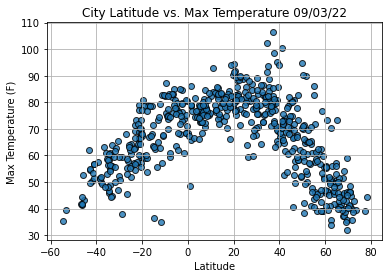

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

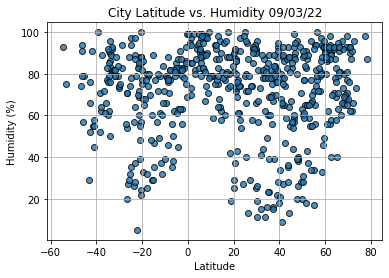

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig2.png")

# Show plot.
plt.show()

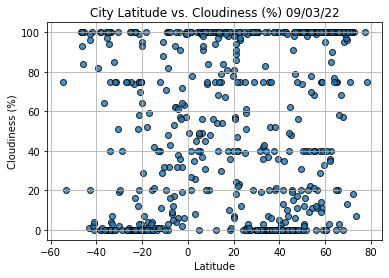

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

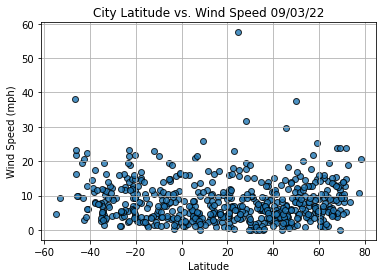

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()